<img src="https://upload.wikimedia.org/wikipedia/fr/0/0b/Polytech_Lyon_logo.png" alt="drawing" height="200"/>

# Traitement de données & Programmation en Python
---



# TD 06

Traitement de données

Elements à consulter:





Doc                                   |             Link
--------------------------------------|------------------------------------
Github Helper      | [>link<](#scrollTo=Github_101)
Python en 30 jours | [>link<](https://moncoachdata.com/courses/apprendre-python-en-30-jours/)
Get started with pandas | [>link<](https://colab.research.google.com/notebooks/snippets/pandas.ipynb)

## Intro

Le premier bloc devrait toujours contenir les installs/imports dont on aura besoin pour le reste

In [1]:
# Installs
print("Python is awesome 👍")

Python is awesome 👍


## EX01
### Dataframes

* Importer la librairie pandas
* lire dataset 'tv_shows.csv' dans une variable tv_data
* Afficher les 10 premieres lignes du dataset
* Créer une colonne "sreaming_platform" qui contient le nom de la plateforme de streaming en se basant sur les colonnes (hulu, prime, disney, netflix)
* Drop les colonnes (hulu, prime, disney, netflix)
* Afficher le nombre de shows par plateforme de streaming
* Afficher la note moyenne (imdb) par plateforme de streaming
* Assigner a une variable top_shows, les meilleurs shows par plateforme de streaming et afficher cette dernière
> bonus 
* Faire un graphique avec le nombre de shows par année (sur Y, et sur l'axe X les années) par plateforme de streaming (en series). Libres sur le choix du graphique [help](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html)

In [303]:
import pandas as pd

tv_data = pd.read_csv("./tv_shows.csv", sep = ",")

tv_data[0:10]



,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type;
0,1.0,Breaking Bad,2008.0,18+,9.4/10,100/100,1.0,0.0,0.0,0.0,1;
1,2.0,Stranger Things,2016.0,16+,8.7/10,96/100,1.0,0.0,0.0,0.0,1;
2,3.0,Attack on Titan,2013.0,18+,9.0/10,95/100,1.0,1.0,0.0,0.0,1;
3,4.0,Better Call Saul,2015.0,18+,8.8/10,94/100,1.0,0.0,0.0,0.0,1;
4,5.0,Dark,2017.0,16+,8.8/10,93/100,1.0,0.0,0.0,0.0,1;
5,6.0,Avatar: The Last Airbender,2005.0,7+,9.3/10,93/100,1.0,0.0,1.0,0.0,1;
6,7.0,Peaky Blinders,2013.0,18+,8.8/10,93/100,1.0,0.0,0.0,0.0,1;
7,8.0,The Walking Dead,2010.0,18+,8.2/10,93/100,1.0,0.0,0.0,0.0,1;
8,9.0,Black Mirror,2011.0,18+,8.8/10,92/100,1.0,0.0,0.0,0.0,1;
9,10.0,The Queen's Gambit,2020.0,18+,8.6/10,92/100,1.0,0.0,0.0,0.0,1;


In [299]:
#Créer une colonne "sreaming_platform" qui contient le nom de la plateforme de streaming en se basant sur les colonnes (hulu, prime, disney, netflix)
import pandas as pd

tv_data = pd.read_csv("./tv_shows.csv", sep = ",")

#tv_data.describe()

netflix=tv_data.loc[tv_data['Netflix'] ==True]
hulu =tv_data.loc[tv_data['Hulu']==True]
prime=tv_data.loc[tv_data['Prime Video'] ==True]
disney=tv_data.loc[tv_data['Disney+']==True]


plateformes = [netflix, hulu, prime, disney]
plateformes['Streaming_plateform'] = 'Netflix', 'Hulu', 'Prime Video', 'Disney+'
tv_shows = pd.concat(plateformes)
print(tv_shows)



ValueError: Length of values (4) does not match length of index (5368)

In [77]:
#drop
import pandas as pd

tv_data = pd.read_csv("./tv_shows.csv", sep = ",")

new_data = tv_data.drop(['Netflix', 'Hulu', 'Prime Video', 'Disney+'], axis=1)

new_data.head()


,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Type;
0,1.0,Breaking Bad,2008.0,18+,9.4/10,100/100,1;
1,2.0,Stranger Things,2016.0,16+,8.7/10,96/100,1;
2,3.0,Attack on Titan,2013.0,18+,9.0/10,95/100,1;
3,4.0,Better Call Saul,2015.0,18+,8.8/10,94/100,1;
4,5.0,Dark,2017.0,16+,8.8/10,93/100,1;


In [176]:
#Afficher le nombre de shows par plateforme de streaming
import pandas as pd

tv_data = pd.read_csv("./tv_shows.csv", sep = ",")

nb_netflix = tv_data.where(tv_data['Netflix'] > 0)
net = nb_netflix.Netflix.count()
print(f'Il y a {net} shows sur la plateforme Netflix')

nb_prime = tv_data.where(tv_data['Prime Video'] > 0)
prime = nb_prime['Prime Video'].count()
print(f'Le nombre de shows sur la plateforme Video Prime est de : {prime}')

nb_hulu = tv_data.where(tv_data['Hulu'] > 0)
hulu = nb_hulu.Hulu.count()
print(f'Le nombre de shows sur la plateforme Hulu est de : {hulu}')

nb_disney = tv_data.where(tv_data['Disney+'] > 0)
disney = nb_disney['Disney+'].count()
print(f'Le nombre de shows sur la plateforme Disney+ est de : {disney}')



Il y a 1940 shows sur la plateforme Netflix
Le nombre de shows sur la plateforme Video Prime est de : 1803
Le nombre de shows sur la plateforme Hulu est de : 1596
Le nombre de shows sur la plateforme Disney+ est de : 346


In [263]:
#Afficher la note moyenne (imdb) par plateforme de streaming
import pandas as pd

tv_data = pd.read_csv("./tv_shows.csv", sep = ",", header=0, dtype={'ID': int, 'Title': str,'Year': int,'IMDb': str,'Rotten Tomatoes': str,'Netflix': bool,'Hulu': bool,'Prime Video': bool, 'Disney+': bool,'Type': int})


tv_data.dropna(axis = 1)
data = tv_data.groupby(['IMDb', 'Netflix'])

data.mean()


ID    Year  Hulu  Prime Video  Disney+
IMDb   Netflix                                            
1.1/10 1.0      1543.0  2021.0   0.0          0.0      0.0
1.5/10 0.0      3305.0  2019.0   1.0          0.0      0.0
1.8/10 0.0      3162.5  2007.0   1.0          0.0      0.0
1.9/10 0.0      3282.0  2018.0   1.0          0.0      0.0
2.3/10 0.0      3012.0  2014.0   1.0          0.0      0.0
...                ...     ...   ...          ...      ...
9.3/10 1.0        43.5  2012.0   0.0          0.5      0.0
9.4/10 0.0      5623.0  2020.0   0.0          0.0      1.0
       1.0         1.0  2008.0   0.0          0.0      0.0
9.5/10 0.0      3818.0  1987.0   0.0          1.0      0.0
9.6/10 0.0      4727.5  2019.0   0.0          0.5      0.5

[142 rows x 5 columns]

In [289]:
#Assigner a une variable top_shows, les meilleurs shows par plateforme de streaming et afficher cette dernière
import pandas as pd

tv_data = pd.read_csv("./tv_shows.csv", sep = ",")

#maximum_netflix = tv_data[tv_data['Netflix']==tv_data['Netflix'].max()]
#print(maximum_netflix)

#netflix = tv_data.groupby(['Rotten Tomatoes'], sort=False)['Netflix'].idxmax()
#print(netflix)
#idx = tv_data.groupby(['Rotten Tomatoes'])['Netflix'].transform(max) == tv_data['Netflix']
#tv_data.loc[tv_data.groupby(["Rotten Tomatoes", "Netflix"])["Netflix"].idxmax()]  
tv_data.sort_values('Rotten Tomatoes', ascending=False).drop_duplicates(['Netflix','Rotten Tomatoes'])


,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type;
1,2.0,Stranger Things,2016.0,16+,8.7/10,96/100,1.0,0.0,0.0,0.0,1;
2,3.0,Attack on Titan,2013.0,18+,9.0/10,95/100,1.0,1.0,0.0,0.0,1;
5057,5376.0,Loki,2021.0,16+,8.5/10,95/100,0.0,0.0,0.0,1.0,1;
5058,5377.0,The Mandalorian,2019.0,16+,8.8/10,94/100,0.0,0.0,0.0,1.0,1;
3,4.0,Better Call Saul,2015.0,18+,8.8/10,94/100,1.0,0.0,0.0,0.0,1;
...,...,...,...,...,...,...,...,...,...,...,...
0,1.0,Breaking Bad,2008.0,18+,9.4/10,100/100,1.0,0.0,0.0,0.0,1;
1950,1960.0,Rick and Morty,2013.0,18+,9.2/10,100/100,0.0,1.0,0.0,0.0,1;
5056,5375.0,Lego Set Builds Chima - Artifex,2017.0,NaN,NaN,10/100,0.0,0.0,1.0,0.0,1;
1946,1956.0,The Confrontation,2018.0,NaN,NaN,10/100,1.0,0.0,0.0,0.0,1;


<AxesSubplot:xlabel='ID', ylabel='Year'>

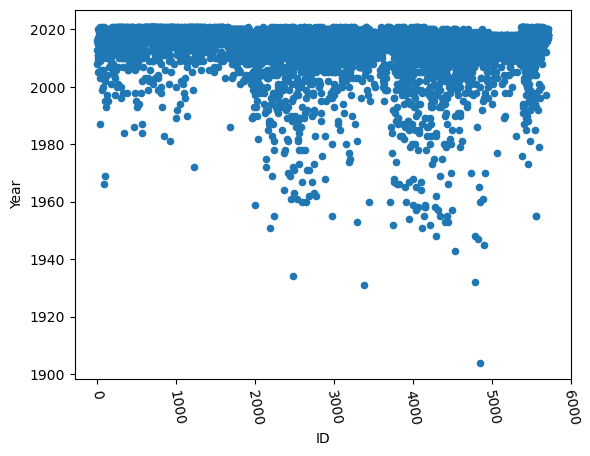

In [300]:
#graphique
import pandas as pd

tv_data = pd.read_csv("./tv_shows.csv", sep = ",")
tv_data.plot.scatter(x='ID', y='Year', rot =1000)


##EX02
### Pandas Power

TBD (apres la pause)

In [8]:
# Code here
